In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This notebook explores the translink data. 

In [2]:
dataDir = "/home/user1/Documents/school/math402/translink/translink-data/project-data/20200124_sfu_stop_data.csv"
# dataDir = "/home/user1/Documents/school/math402/translink/translink-data/project-data/20200124_sfu_stop_data_OCT.csv"

df = pd.read_csv(dataDir)
dfNorth = df[df['direction'] == 'NORTH']
stopDict = {}
stopSampleCount = {}

for row in dfNorth.iloc:
    if row['from_no'] in stopDict:
        if row['time_period'] == 'PM Peak' or row['time_period'] == 'AM Peak':
            stopDict[row['from_no']] += row['total_boardings']
            stopSampleCount[row['from_no']] += 1
    else:
        stopDict[row['from_no']] = 0
        stopSampleCount[row['from_no']] = 0

46


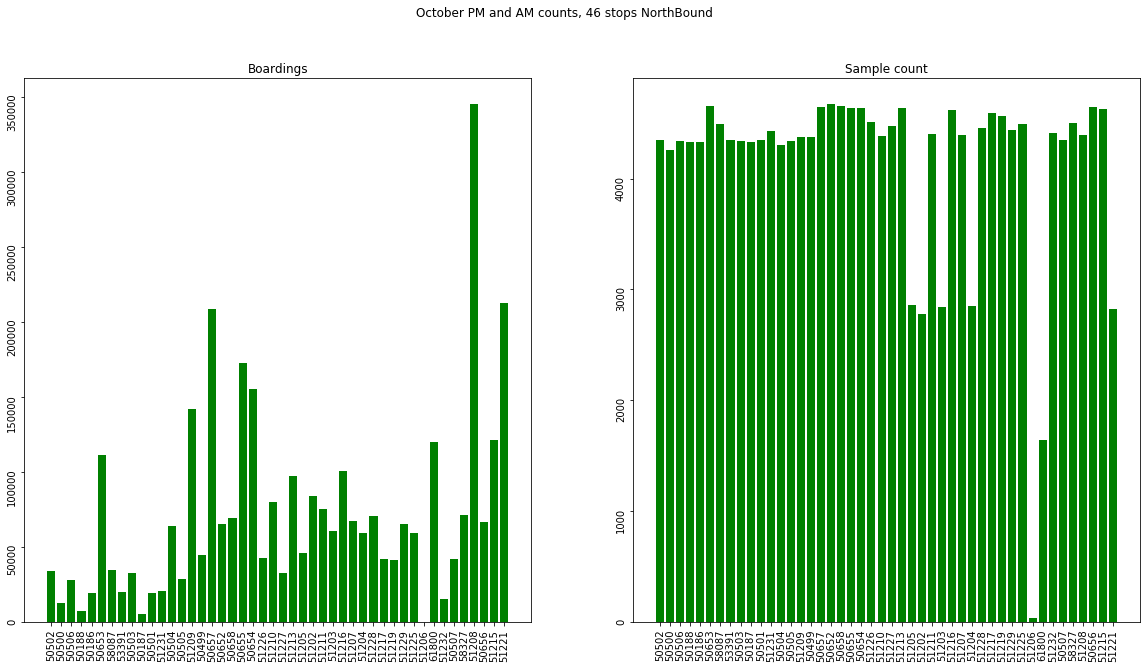

In [3]:
print(len(stopDict))
keys = [str(id) for id in stopDict.keys()]

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('October PM and AM counts, 46 stops NorthBound')

axs[0].bar(keys, stopDict.values(), color='g')
axs[0].tick_params(labelrotation=90)
axs[0].set_title('Boardings')

axs[1].bar(keys, stopSampleCount.values(), color='g')
axs[1].tick_params(labelrotation=90)
axs[1].set_title('Sample count')
plt.show()
